In [1]:
import pandas as pd #used for data manipulation and analysis
import matplotlib.pyplot as plt #used for plotting data
import numpy as np #used for mathematical functions
from numpy import arange
from scipy.stats import linregress

In [2]:
"""finds the mean score of all the year levels based an LGA within a specified subject"""
def fill_year(subject, all_lga, year_lvl):
    """loops through each year level and for each data point within them, append the scores into a position where all of the
    scores are grouped by year levels"""
    scores = []
    position = 1
    for i in year_lvl:
        yr_lvl = subject.loc[subject['Year_Level'] == i]
        for j in range(len(yr_lvl)):
            row = yr_lvl.iloc[j,]
            if row["LGA_DESC"] in all_lga:
                scores.insert(j*position  , row["Indicator_Calc"])
        position += 1
    
    """finds the mean scores of each LGA by looping through the scores list and finding the mean between the scores across the
    year levels"""
    num_yr_lvls = len(year_lvl)
    sum_score = 0
    counter = 1
    scores2 = []
    for i in scores:
        sum_score += i
        if counter % num_yr_lvls == 0:
            scores2.append(sum_score/num_yr_lvls)
            sum_score = 0
            counter = 0
        counter += 1
    return scores2

In [3]:
"""finds the list of scores for a single year level by looping through the dataset and 
appending the scores in a list if the year levels matches the inputted year level and the LGA is shared among the datasets"""
def fill_year_level(subject, all_lga, year_lvl):
    scores = []
    for i in range(len(subject)):
        row = subject.iloc[i,]
        if (row['Year_Level'] == year_lvl) & (row['LGA_DESC'] in all_lga):
            scores.append(row['Indicator_Calc'])
    return scores

In [4]:
#https://stackoverflow.com/questions/22239691/code-for-line-of-best-fit-of-a-scatter-plot-in-python
"""generates the gradient and y intercept for line of best fit"""
def best_fit(X, Y):

    xbar = sum(X)/len(X)
    ybar = sum(Y)/len(Y)
    n = len(X) # or len(Y)

    numer = sum([xi*yi for xi,yi in zip(X, Y)]) - n * xbar * ybar
    denum = sum([xi**2 for xi in X]) - n * xbar**2

    b = numer / denum
    a = ybar - b * xbar

    print('best fit line:\ny = {:.2f} + {:.2f}x'.format(a, b))

    return a, b


best fit line:
y = 96.13 + -0.08x


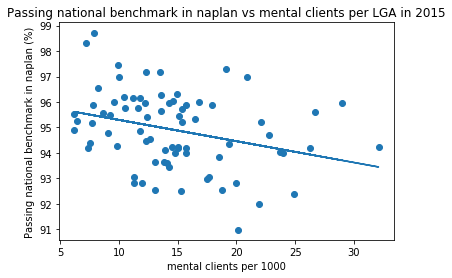

LinregressResult(slope=-0.08364456336785236, intercept=96.13191738565926, rvalue=-0.3083475243305985, pvalue=0.0067297008932047, stderr=0.029997628269701253)

In [5]:
#pre-processes and integrates the data, then visualises the academic score vs mental health clients count
"""reads dataset to be used in python"""
lit = pd.read_csv('VCAMS_Indicator_11_1.csv', encoding = 'ISO-8859-1')
num = pd.read_csv('VCAMS_Indicator_11_2.csv', encoding = 'ISO-8859-1')
mental = pd.read_csv('2015 Local Government Area Profiles.csv', encoding = 'ISO-8859-1')

"""removes rows that contains the summary of the data, keeps the raw data"""
lit_clean = lit.iloc[:2532-2]
num_clean = num.iloc[:2532-2]
mental_clean = mental.iloc[:81-2]

"""removes the missing data if there is no data on the relevant measure of scores"""
lit_clean = lit_clean.loc[lit_clean['Indicator_Calc'] != '']
num_clean = num_clean.loc[num_clean['Indicator_Calc'] != '']
lit_clean = lit_clean.loc[lit_clean['Indicator_Calc'] != 'NDP']
num_clean = num_clean.loc[num_clean['Indicator_Calc'] != 'NDP']
mental_clean = mental_clean.loc[mental_clean['Registered mental health clients per 1,000 population'] != None]

lit_clean = lit_clean.loc[lit_clean['LGA_DESC'] != 'Unknown LGA in Victoria']
num_clean = num_clean.loc[num_clean['LGA_DESC'] != 'Unknown LGA in Victoria']
lit_clean = lit_clean.loc[lit_clean['LGA_DESC'] != '']
num_clean = num_clean.loc[num_clean['LGA_DESC'] != '']
mental_clean = mental_clean.loc[mental_clean['LGA Name'] != '']

"""Use data only within the year 2015"""
lit_2015 = lit_clean.loc[lit['Year'] == '2015']
num_2015 = num_clean.loc[num['Year'] == '2015']
"""remove '%' sign and turns the numbers into numeric values"""
lit_2015 = lit_2015.replace('%','', regex = True)
num_2015 = num_2015.replace('%','', regex = True)
num_2015['Indicator_Calc'] = num_2015['Indicator_Calc'].apply(pd.to_numeric)
lit_2015['Indicator_Calc'] = lit_2015['Indicator_Calc'].apply(pd.to_numeric)

"""converts all lga into lower case"""
lit_2015["LGA_DESC"] = lit_2015["LGA_DESC"].str.lower()
num_2015["LGA_DESC"] = num_2015["LGA_DESC"].str.lower()
mental_clean["LGA Name"] = mental_clean["LGA Name"].str.lower()

"""finds the common lga between year levels and creates a list of it in sorted order"""
year_lvl = list(set(lit_2015['Year_Level']))
year_lvl.sort()

"""finds the common lga's between all year levels by looping through the literature's LGA's list 
adding the common ones into a list"""
yrs_lga = []
is_first_year = 1
for i in year_lvl:
    year = lit_2015.loc[lit_2015['Year_Level'] == i]
    
    """use the first year level's set of LGAs as a basis to find common LGAs"""
    if is_first_year:
        yrs_lga = year["LGA_DESC"]
        flag = 0
        
    #finds the intersection between LGAs if there is a set of LGAs to compare it to
    else:
        yrs_lga = list(set(yrs_lga) & set(year["LGA_DESC"]))
        
"""use the existing common LGAs from literature to loop through and find the common LGA between all the year 
levels in literacy and numeracy"""
for i in year_lvl:
    year = num_2015.loc[num_2015['Year_Level'] == i]
    yrs_lga = list(set(yrs_lga) & set(year["LGA_DESC"]))

"""makes a list of all the LGAs in common between the literacy/numeracy dataset and the mental illness dataset, 
then sorts them"""
lga_mental = mental_clean['LGA Name']
all_lga = list(set(yrs_lga) & set(lga_mental))
all_lga.sort()

"""finds the mean score of each year levels based on LGA in only literacy"""
year3_lit = fill_year_level(lit_2015, all_lga, 'Year 3')
year5_lit = fill_year_level(lit_2015, all_lga, 'Year 5')
year7_lit = fill_year_level(lit_2015, all_lga, 'Year 7')
year9_lit = fill_year_level(lit_2015, all_lga, 'Year 9')

"""finds the mean score of all the year levels based on LGA in literacy and numeracy"""
lit_scores = fill_year(lit_2015, all_lga, year_lvl)
num_scores = fill_year(num_2015, all_lga, year_lvl)

"""loops through the literacy and numeracy scores and finds the mean based on LGA to create an intelligence lsit"""
int_scores = []
for i in range(len(all_lga)):
    total = (lit_scores[i] + num_scores[i])/2
    int_scores.append(total)

"""Detects outliers in the overall intelligence by looping through the intelligence scores making a list of flags
to determine whether the scores are 3 iqr ranges below the 3rd quartile or 3 iqr ranges above the first quartile, if not
then they are labelled as an outlier"""
int_scores_s = pd.Series(int_scores)
q1=int_scores_s.quantile(.25)
q3=int_scores_s.quantile(.75)
iqr = q3-q1
is_outlier = []
for i in int_scores:
    if (i > q3 + 3*iqr) | (i < q1 - 3*iqr):
        is_outlier.append(1)
    else:
        is_outlier.append(0)
    
"loops through the mental illness data and collects mental illness counts based on LGA"
mental_scores = []
for i in range(len(mental_clean)):
    row = mental_clean.iloc[i,]
    if row["LGA Name"] in all_lga:
        mental_scores.append(row["Registered mental health clients per 1,000 population"])


        
"""integrates the relevant datasets into a dataframe"""
mental_edu = pd.DataFrame({"LGA": all_lga,"Passing national benchmark in naplan": int_scores, 
                              "mental clients per 1000": mental_scores, "is_outlier": is_outlier, "lit scores": lit_scores, 
                              "num scores": num_scores, "year3 lit": year3_lit, "year5 lit": year5_lit, 
                              "year7 lit": year7_lit, "year9 lit": year9_lit})

"""finds the gradient and y intercept of the line of best fit with mental clients as the x axis
and passing national benchmark as the y axis"""
c, m= best_fit(mental_edu["mental clients per 1000"], mental_edu["Passing national benchmark in naplan"])

"""creates the scatter plot with mental clients as x axis and passing national benchmark as y axis"""
plt.scatter(mental_edu["mental clients per 1000"], mental_edu["Passing national benchmark in naplan"])

"""generates the points on the best fit line in a list and plots them"""
yfit = [c + m * xi for xi in mental_edu["mental clients per 1000"]]
plt.plot(mental_edu["mental clients per 1000"], yfit)

"""adds neccessary titles, labels and plots the graph of mental clients vs passing national benchmark"""
plt.title("Passing national benchmark in naplan vs mental clients per LGA in 2015")
plt.xlabel("mental clients per 1000")
plt.ylabel("Passing national benchmark in naplan (%)")
plt.show()

"""print outliers"""
for i in range(len(mental_edu)):
    row = mental_edu.iloc[i,]
    if row["is_outlier"] == 1:
        print("point ({}, {}) is an outlier".format(row["mental clients per 1000"], row["Passing national benchmark in naplan"]))

"""generates the analysis from the regression"""
linregress(mental_edu["mental clients per 1000"], mental_edu["Passing national benchmark in naplan"])


best fit line:
y = 96.91 + -0.19x
best fit line:
y = 96.46 + -0.17x
best fit line:
y = 97.79 + -0.15x
best fit line:
y = 95.40 + -0.19x


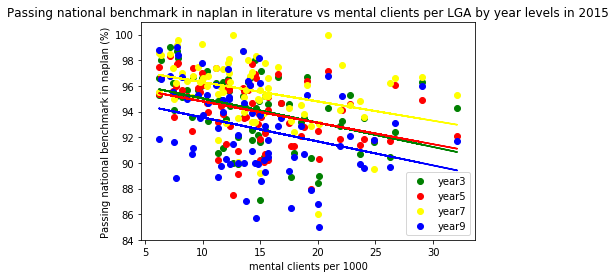

year 3: LinregressResult(slope=-0.1890113531374337, intercept=96.91400186471755, rvalue=-0.40766392862565437, pvalue=0.0002570101374908755, stderr=0.049215661553229144)
year 5: LinregressResult(slope=-0.16679095299238145, intercept=96.46212797575022, rvalue=-0.3688662975008039, pvalue=0.0010423098327614058, stderr=0.04885723164355813)
year 7: LinregressResult(slope=-0.14988761822486685, intercept=97.78684030122882, rvalue=-0.33082974944618126, pvalue=0.0035117830502912483, stderr=0.04970211907925355)
year 9: LinregressResult(slope=-0.18651559580655516, intercept=95.4037515254026, rvalue=-0.3104738107009096, pvalue=0.006341193830199865, stderr=0.06638407008335588)


In [6]:
#Create visualisation and analysis for passing national benchmark vs mental clients grouped by year levels in literature
#note assumes literacy and numeracy are affected in the same way as grade
"""finds the gradient and y intercept of the line of best fit with mental clients as the x axis
and passing national benchmark as the y axis for each year level"""
c1, m1 = best_fit(mental_edu["mental clients per 1000"], mental_edu["year3 lit"])
c2, m2 = best_fit(mental_edu["mental clients per 1000"], mental_edu["year5 lit"])
c3, m3 = best_fit(mental_edu["mental clients per 1000"], mental_edu["year7 lit"])
c4, m4 = best_fit(mental_edu["mental clients per 1000"], mental_edu["year9 lit"])

"""creates the scatter plot with mental clients as x axis and passing national benchmark by year level on the y axis"""
plt.scatter(mental_edu["mental clients per 1000"], mental_edu["year3 lit"], color='green', label='year3')
plt.scatter(mental_edu["mental clients per 1000"], mental_edu["year5 lit"], color='red', label='year5')
plt.scatter(mental_edu["mental clients per 1000"], mental_edu["year7 lit"], color='yellow', label='year7')
plt.scatter(mental_edu["mental clients per 1000"], mental_edu["year9 lit"], color='blue', label='year9')

"""generates the points on the best fit line and plots them for each year level in a list"""
yfit1 = [c1 + m1 * xi for xi in mental_edu["mental clients per 1000"]]
yfit2 = [c2 + m2 * xi for xi in mental_edu["mental clients per 1000"]]
yfit3 = [c3 + m3 * xi for xi in mental_edu["mental clients per 1000"]]
yfit4 = [c4 + m4 * xi for xi in mental_edu["mental clients per 1000"]]

"""plots the points on the best fit line for each year level"""
plt.plot(mental_edu["mental clients per 1000"], yfit1, color='green')
plt.plot(mental_edu["mental clients per 1000"], yfit2, color='red')
plt.plot(mental_edu["mental clients per 1000"], yfit3, color='yellow')
plt.plot(mental_edu["mental clients per 1000"], yfit4, color='blue')


"""adds neccessary titles, labels and plots the graph of mental clients vs passing national benchmark"""
plt.xlabel("mental clients per 1000")
plt.ylabel("Passing national benchmark in naplan (%)")
plt.title("Passing national benchmark in naplan in literature vs mental clients per LGA by year levels in 2015")
plt.legend()
plt.show()

"""generates the analysis from the regression for each year level"""
print("year 3: {}".format(linregress(mental_edu["mental clients per 1000"], mental_edu["year3 lit"])))
print("year 5: {}".format(linregress(mental_edu["mental clients per 1000"], mental_edu["year5 lit"])))
print("year 7: {}".format(linregress(mental_edu["mental clients per 1000"], mental_edu["year7 lit"])))
print("year 9: {}".format(linregress(mental_edu["mental clients per 1000"], mental_edu["year9 lit"])))

In [7]:
#adds a 'is smart' label for each data point based on the intelligence score
is_smart = []
for i in int_scores:
    if i > 95.0:
        is_smart.append(1)
    else:
        is_smart.append(0)
mental_edu["is smart"] = is_smart

In [8]:
#k nearest neighbour
from sklearn import neighbors
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import preprocessing

"""gets the feature believed to determine intelligence in an LGA"""
data = mental_edu[['mental clients per 1000',]]

"""gets the class label"""
classlabel = mental_edu['is smart']

"""make 66% of the data the training set and the rest to be the testing set """
x_train, x_test, y_train, y_test = train_test_split(data, classlabel, train_size = 0.66, random_state = 42)

"""normalise the data in preparation for computing distance"""
scaler = preprocessing.StandardScaler().fit(x_train)
x_train = scaler.transform(x_train)
x_test=scaler.transform(x_test)

C:\Users\tomma\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


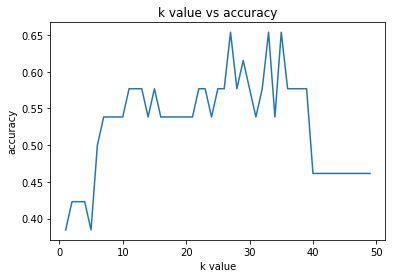

In [9]:
#generates all the possible k nearest neighbors from 1 to 50 to determine best k value

"""generates numbers form 1 to 50"""
ks = range(1,50,1)

"""loops through the possible k value from 1 to 50 then trains and predict using the training and testing set.
Then returns the accuracy for each k value"""
accu_list=[]
for k in ks:
    knn = neighbors.KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train) 
    y_pred=knn.predict(x_test)
    accu_list.append(accuracy_score(y_test, y_pred))
    
"""plots the change in accuracy as k values changes"""
plt.plot(ks,accu_list)
plt.xlabel("k value")
plt.ylabel("accuracy")
plt.title("k value vs accuracy")
plt.show()

In [10]:
"""pick k value by human evaluation of the graph"""
knn = neighbors.KNeighborsClassifier(n_neighbors=13)
knn.fit(x_train,y_train)

"""shows the accuracy of the 13th nearest neighbor"""
y_pred = knn.predict(x_test)
print("accuracy of k nearest neighbors at k-value=13: {}".format(accuracy_score(y_test,y_pred)))

accuracy of k nearest neighbors at k-value=13: 0.5769230769230769


In [11]:
import math,random
from scipy.spatial.distance import pdist, squareform
%matplotlib inline



def VAT(R):
    """

    VAT algorithm adapted from matlab version:
    http://www.ece.mtu.edu/~thavens/code/VAT.m

    Args:
        R (n*n double): Dissimilarity data input
        R (n*D double): vector input (R is converted to sq. Euclidean distance)
    Returns:
        RV (n*n double): VAT-reordered dissimilarity data
        C (n int): Connection indexes of MST in [0,n)
        I (n int): Reordered indexes of R, the input data in [0,n)
    """
        
    R = np.array(R)
    N, M = R.shape
    if N != M:
        R = squareform(pdist(R))
        
    J = list(range(0, N))
    
    y = np.max(R, axis=0)
    i = np.argmax(R, axis=0)
    j = np.argmax(y)
    y = np.max(y)


    I = i[j]
    del J[I]

    y = np.min(R[I,J], axis=0)
    j = np.argmin(R[I,J], axis=0)
    
    I = [I, J[j]]
    J = [e for e in J if e != J[j]]
    
    C = [1,1]
    for r in range(2, N-1):   
        y = np.min(R[I,:][:,J], axis=0)
        i = np.argmin(R[I,:][:,J], axis=0)
        j = np.argmin(y)        
        y = np.min(y)      
        I.extend([J[j]])
        J = [e for e in J if e != J[j]]
        C.extend([i[j]])
    
    y = np.min(R[I,:][:,J], axis=0)
    i = np.argmin(R[I,:][:,J], axis=0)
    
    I.extend(J)
    C.extend(i)
    
    RI = list(range(N))
    for idx, val in enumerate(I):
        RI[val] = idx

    RV = R[I,:][:,I]
    
    return RV.tolist(), C, I




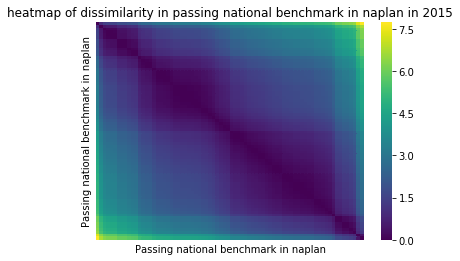

In [12]:
import seaborn as sns

"""copy the relevant columns"""
mental_edu2=mental_edu[["Passing national benchmark in naplan"]]

"""turn data into matrix format"""
mental_edu3=mental_edu2.copy().as_matrix()

"""compute the dissimilarity matrix"""
sq = squareform(pdist(mental_edu3))

"""Apply VAT Algorithm to dataset and visualise using heatmap"""
RV, C, I = VAT(mental_edu3)
x=sns.heatmap(RV,cmap='viridis',xticklabels=False,yticklabels=False)
plt.title("""heatmap of dissimilarity in passing national benchmark in naplan in 2015""")
x.set(xlabel='Passing national benchmark in naplan', ylabel='Passing national benchmark in naplan')
plt.show()

In [15]:
mental_edu

,LGA,Passing national benchmark in naplan,is_outlier,lit scores,mental clients per 1000,num scores,year3 lit,year5 lit,year7 lit,year9 lit,is smart
0,alpine (s),97.3125,0,96.125,19.1,98.500,96.7,96.4,96.1,95.3,1
1,ararat (rc),95.6125,0,94.550,26.7,96.675,92.4,96.1,96.6,93.1,1
2,ballarat (c),93.8500,0,93.175,18.5,94.525,93.2,92.1,94.5,92.9,0
3,banyule (c),96.2000,0,95.800,10.4,96.600,97.2,94.7,96.0,95.3,1
4,bass coast (s),95.8625,0,94.675,15.7,97.050,95.2,95.1,96.6,91.8,1
5,baw baw (s),94.8625,0,93.850,11.8,95.875,91.2,93.8,95.5,94.9,0
6,bayside (c),98.3125,0,98.150,7.2,98.475,99.0,98.3,98.5,96.8,1
7,benalla (rc),94.1750,0,92.025,26.3,96.325,90.5,91.7,96.2,89.7,0
8,boroondara (c),98.7250,0,98.500,7.9,98.950,98.2,97.8,99.6,98.4,1
9,brimbank (c),92.8250,0,92.075,12.0,93.575,93.4,91.5,93.1,90.3,0
